#Тестовая работа

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime
import math
from IPython.display import display

In [2]:
pip install lifetimes

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import lifetimes
from lifetimes.plotting import plot_period_transactions
from lifetimes.plotting import plot_probability_alive_matrix

In [4]:
dt = pd.read_excel('test_case.xlsx')

In [5]:
display(dt.head(5))

,product_id,quantity,is_trial_period,purchase_date,user_id
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991
3,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,9455582
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,8803657


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114200 entries, 0 to 114199
Data columns (total 5 columns):
product_id         114200 non-null object
quantity           114200 non-null int64
is_trial_period    114200 non-null bool
purchase_date      114200 non-null datetime64[ns]
user_id            114200 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(2), object(1)
memory usage: 3.6+ MB


In [7]:
dt['purchase_date'].describe() 

count                  114200
unique                     51
top       2020-02-13 00:00:00
freq                     3345
first     2020-01-01 00:00:00
last      2020-02-20 00:00:00
Name: purchase_date, dtype: object

**Вывод:** Нами получен датасет, содержащий 114 200 записей без пропусков, за период с 01.01.2020 по 20.02.2020 (51 день). Все типы данных и названия столбцов корректны.

## Корректировка данных

Для удобства дальнейшей работы изменим тип данных для столбцов quantity и user_id. 

In [8]:
dt['quantity'] = dt['quantity'].astype('int8') #В столбце есть только единичные значения.

In [9]:
dt['user_id'] = dt['user_id'].astype('int32')

In [10]:
dt.duplicated().sum() #Проверим дубликабы в датасете

84

In [11]:
dt[dt.duplicated(keep=False)].sort_values(by=['user_id']) #Проверим визуально, что у нас за дубликаты

,product_id,quantity,is_trial_period,purchase_date,user_id
74432,1week_4.99_USD_subscription_7days_trial,1,False,2020-01-24,1335694
82201,1week_4.99_USD_subscription_7days_trial,1,False,2020-01-24,1335694
9344,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-10,1639577
8316,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-10,1639577
94832,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-11,5943648
...,...,...,...,...,...
82951,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,9584301
57784,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,9584301
83300,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,9584301
75010,1week_4.99_USD_subscription_7days_trial,1,True,2020-02-16,9591977


Так как у нас в файле есть только данные о транзакциях - либо оформление пробной подписки, либо оплата после завершения пробного периода - задвоений быть не может и мы их удалим. 

In [12]:
dt.drop_duplicates().reset_index(drop=True) #Удалим дубликаты

,product_id,quantity,is_trial_period,purchase_date,user_id
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991
3,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,9455582
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,8803657
...,...,...,...,...,...
114111,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-04,8291100
114112,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-02,8236936
114113,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-03,8247910
114114,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-04,8294146


In [13]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114200 entries, 0 to 114199
Data columns (total 5 columns):
product_id         114200 non-null object
quantity           114200 non-null int8
is_trial_period    114200 non-null bool
purchase_date      114200 non-null datetime64[ns]
user_id            114200 non-null int32
dtypes: bool(1), datetime64[ns](1), int32(1), int8(1), object(1)
memory usage: 2.4+ MB


**Вывод:** Теперь данные не содержат дубликатов и готовы к обработке.

## Расчет LTV

In [14]:
dt['revenue'] = np.where(dt['is_trial_period']!= True, 4.99, 0) 
#Добавим выручку для тех пользователей, у кого закончился тестовый период
dt.sample(5)

,product_id,quantity,is_trial_period,purchase_date,user_id,revenue
52131,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-08,8320857,4.99
14751,1week_4.99_USD_subscription_7days_trial,1,True,2020-02-13,9506029,0.00
32630,1week_4.99_USD_subscription_7days_trial,1,True,2020-02-11,9465532,0.00
1347,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-13,9093299,4.99
6145,1week_4.99_USD_subscription_7days_trial,1,True,2020-02-14,9543270,0.00


In [15]:
#Найдем первый день недели, в которые были совершены транзакции.
dt['purchase_week']  = dt['purchase_date'].astype('datetime64[W]')
dt.sample(5)

,product_id,quantity,is_trial_period,purchase_date,user_id,revenue,purchase_week
9577,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-24,8945175,0.00,2020-01-23
58411,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-09,8493163,0.00,2020-01-09
87866,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,8832933,4.99,2020-02-13
49207,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-08,8790908,4.99,2020-02-06
85685,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-06,8409685,0.00,2020-01-02


Создадим датасет содержащий данные только о покупках.

In [16]:
purchase = dt[dt['revenue'] > 0]
display(purchase.sample(5))

,product_id,quantity,is_trial_period,purchase_date,user_id,revenue,purchase_week
73787,1week_4.99_USD_subscription_7days_trial,1,False,2020-01-20,7054199,4.99,2020-01-16
107500,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-14,9130949,4.99,2020-02-13
51187,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-12,8561779,4.99,2020-02-06
101079,1week_4.99_USD_subscription_7days_trial,1,False,2020-01-26,8607312,4.99,2020-01-23
73189,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-15,8877073,4.99,2020-02-13


In [17]:
first_purchase = purchase.groupby('user_id').agg({'purchase_date': 'min'}).reset_index() 
# Определим дату первой покупки для каждого id
first_purchase.columns = ['user_id', 'first_purchase_date']
first_purchase['first_order_week'] = first_purchase['first_purchase_date'].astype('datetime64[W]')
display(first_purchase.sample(5))

,user_id,first_purchase_date,first_order_week
3354,8262854,2020-01-10,2020-01-09
2115,8185037,2020-01-08,2020-01-02
6929,8535076,2020-01-19,2020-01-16
7584,8583773,2020-01-19,2020-01-16
8560,8652076,2020-01-21,2020-01-16


In [18]:
#Посчитаем кол-во новых покупателей за каждую неделю.
cohort_sizes = (
    first_purchase.groupby('first_order_week')
    .agg({'user_id': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_week', 'n_buyers']
display(cohort_sizes) 

,first_order_week,n_buyers
0,2019-12-26,1
1,2020-01-02,325
2,2020-01-09,3475
3,2020-01-16,3169
4,2020-01-23,3198
5,2020-01-30,2858
6,2020-02-06,3160
7,2020-02-13,3270
8,2020-02-20,90


In [19]:
orders_new = pd.merge(purchase,first_purchase, on='user_id') #Построим когорты. 
#Добавим неделю первой покупки каждого покупателя в таблицу с заказами
display(orders_new.head()) 

,product_id,quantity,is_trial_period,purchase_date,user_id,revenue,purchase_week,first_purchase_date,first_order_week
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222,4.99,2020-02-13,2020-02-19,2020-02-13
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402,4.99,2020-02-13,2020-02-17,2020-02-13
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991,4.99,2020-02-13,2020-02-18,2020-02-13
3,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,9455582,4.99,2020-02-13,2020-02-18,2020-02-13
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,8803657,4.99,2020-02-13,2020-01-26,2020-01-23


### Анализ времени совершения покупок

In [20]:
temp_data = orders_new.copy() #сделаем копию основного датасета для анализа времени совершения покупок.

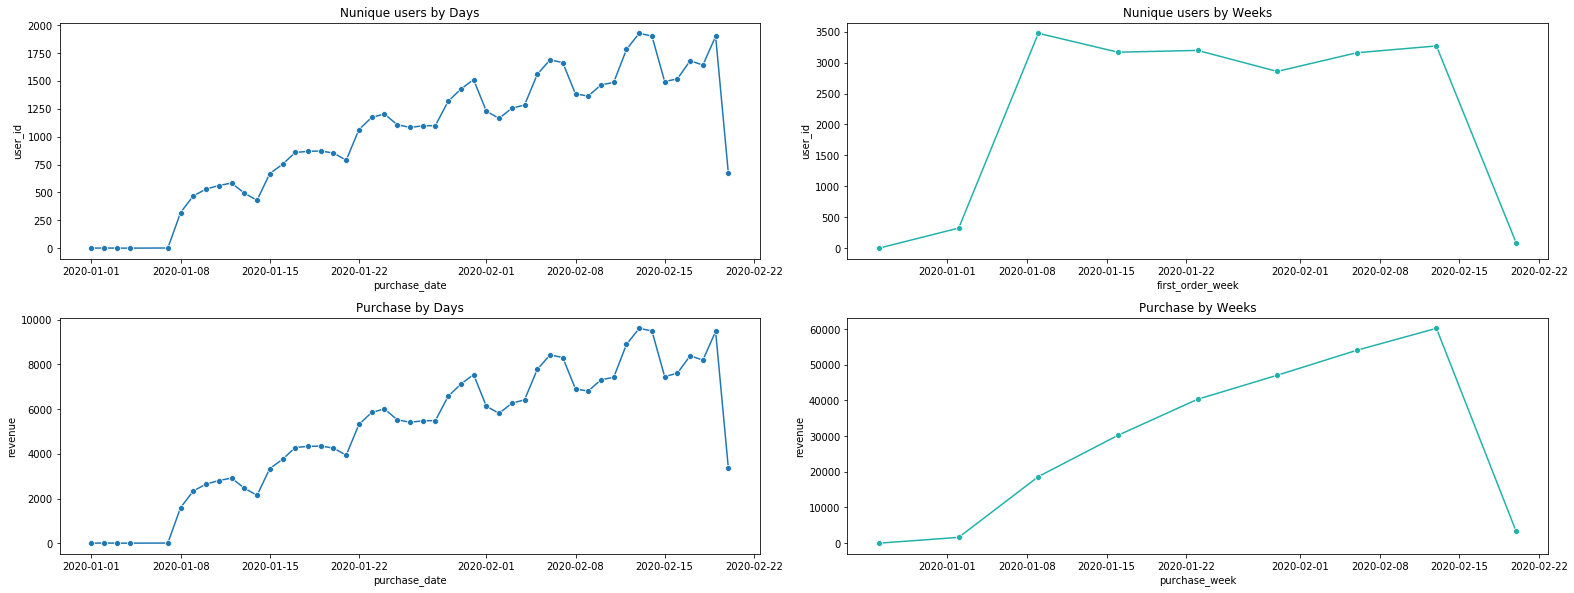

In [21]:
#Посмотрим данные в привязке к времени покупки
plt.figure(figsize=(22,12))
plt.subplot(3,2,1)
sns.lineplot(x = "purchase_date", y = "user_id", data = temp_data.groupby(['purchase_date']).agg({'user_id': 'nunique'}).reset_index(), marker = "o", )
plt.title("Nunique users by Days")

plt.subplot(3,2,2)
sns.lineplot(x = "first_order_week", y = "user_id", data = temp_data.groupby(['first_order_week']).agg({'user_id': 'nunique'}).reset_index(), marker = "o", color = "lightseagreen")
plt.title("Nunique users by Weeks")

plt.subplot(3,2,3)
sns.lineplot(x = "purchase_date", y = "revenue", data = temp_data.groupby(['purchase_date']).agg({'revenue': 'sum'}).reset_index(), marker = "o", )
plt.title("Purchase by Days")

plt.subplot(3,2,4)
sns.lineplot(x = "purchase_week", y = "revenue", data = temp_data.groupby(['purchase_week']).agg({'revenue': 'sum'}).reset_index(), marker = "o", color = "lightseagreen")
plt.title("Purchase by Weeks")

plt.tight_layout()
plt.show()

**Вывод:** В период с 08 января по 15 января мы видим прирост по количеству клиентов и выручке. 
Период с 01 по 08 января количество клиентов не превышает 330. Возможно, в это время еще не запущена основная рекламная кампания. Резкое падение кол-ва клиентов начинается с 19 февраля. 

### Расчет данных по когортам

In [22]:
#Сгруппируем таблицу заказов по неделе первой покупки и неделе каждого заказа и сложим выручку. 
cohorts = (
    orders_new.groupby(['first_order_week', 'purchase_week'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
display(cohorts.sample(10)) 

,first_order_week,purchase_week,revenue
15,2020-01-09,2020-01-09,17345.24
17,2020-01-09,2020-01-23,11332.29
33,2020-01-30,2020-01-30,14281.38
27,2020-01-16,2020-02-20,299.40
31,2020-01-23,2020-02-13,8333.30
24,2020-01-16,2020-01-30,10144.67
30,2020-01-23,2020-02-06,9660.64
36,2020-01-30,2020-02-20,374.25
5,2019-12-26,2020-02-06,4.99
38,2020-02-06,2020-02-13,10748.46


In [23]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_week')
display(report.sample(10)) 

,first_order_week,n_buyers,purchase_week,revenue
22,2020-01-16,3169,2020-01-16,15823.29
30,2020-01-23,3198,2020-02-06,9660.64
15,2020-01-09,3475,2020-01-09,17345.24
36,2020-01-30,2858,2020-02-20,374.25
21,2020-01-09,3475,2020-02-20,359.28
6,2019-12-26,1,2020-02-13,4.99
3,2019-12-26,1,2020-01-16,4.99
13,2020-01-02,325,2020-02-13,848.30
42,2020-02-20,90,2020-02-20,449.10
18,2020-01-09,3475,2020-01-30,10129.70


In [24]:
# LTV считают не из выручки, а из валовой прибыли. Значит, нужно найти валовую прибыль, умножив выручку на маржинальность. 
# LTV — относительный показатель. Значит его удобнее смотреть по «возрастным» когортам, 
#где в столбцах — не неделя заказа, а возраст (age) когорты.

In [25]:
margin_rate = 1 # !!! Поставим ориентировочную маржинальность.

report['gp'] = (report['revenue'] * margin_rate).round(2)
report['age'] = (
    report['purchase_week'] - report['first_order_week']
) / np.timedelta64(1, 'W')
report['age'] = report['age'].round().astype('int')
display(report.sample(15)) 

,first_order_week,n_buyers,purchase_week,revenue,gp,age
40,2020-02-13,3270,2020-02-13,16317.30,16317.30,0
29,2020-01-23,3198,2020-01-30,11521.91,11521.91,1
14,2020-01-02,325,2020-02-20,14.97,14.97,7
1,2019-12-26,1,2020-01-02,4.99,4.99,1
10,2020-01-02,325,2020-01-23,1022.95,1022.95,3
0,2019-12-26,1,2019-12-26,4.99,4.99,0
33,2020-01-30,2858,2020-01-30,14281.38,14281.38,0
39,2020-02-06,3160,2020-02-20,643.71,643.71,2
3,2019-12-26,1,2020-01-16,4.99,4.99,3
7,2020-01-02,325,2020-01-02,1621.75,1621.75,0


Найдём LTV. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы

In [26]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_week', columns='age', values='ltv', aggfunc='mean'
).round(2)

output.fillna('') 

age,0,1,2,3,4,5,6,7
first_order_week,,,,,,,,
2019-12-26,4.99,4.99,4.99,4.99,4.99,,4.99,4.99
2020-01-02,4.99,3.99,3.61,3.15,2.98,2.79,2.61,0.05
2020-01-09,4.99,3.8,3.26,2.92,2.63,2.35,0.1,
2020-01-16,4.99,3.79,3.2,2.74,2.47,0.09,,
2020-01-23,4.99,3.6,3.02,2.61,0.15,,,
2020-01-30,5.00,3.45,2.77,0.13,,,,
2020-02-06,5.00,3.4,0.2,,,,,
2020-02-13,4.99,0.22,,,,,,
2020-02-20,4.99,,,,,,,


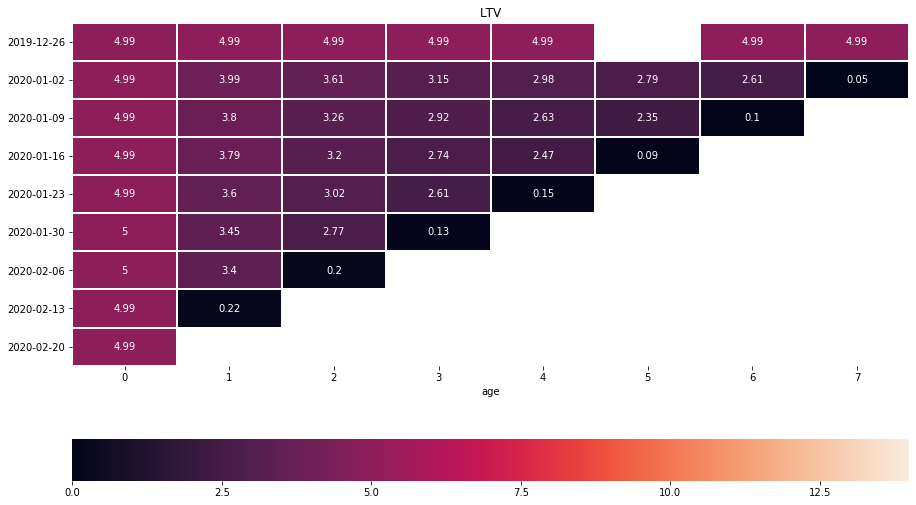

In [27]:
plt.figure(figsize = (15, 9))
output.index = [str(x)[0:10] for x in output.index] #уберем лишние знаки во временной шкале
sns.heatmap(output, annot=True, fmt ='.3g', linewidths=1, linecolor='white', vmin=0, vmax=14, 
            cbar_kws ={'orientation':'horizontal'}
           ).set(title = 'LTV')
plt.show()

In [28]:
ltv_20191226 = output.loc['2019-12-26'].sum()
display(ltv_20191226) 

34.93

In [29]:
def Average(output):
    return sum(output) / len(output)
average = Average(output)
print('Средний LTV на одного покупателя за 9 недель составил:', round(average, 2),'USD')

Средний LTV на одного покупателя за 9 недель составил: 3.11 USD


## Прогноз LTV

Для прогноза используем готовую библиотеку lifetimes https://lifetimes.readthedocs.io/en/latest/index.html

Создадим сводную таблицу данных о транзакциях. Сводная таблица представляет собой не что иное, как таблицу RFM (Recency Frequency Monetary — давность, частота, деньги)

In [30]:
summary =  lifetimes.utils.summary_data_from_transaction_data(purchase,'user_id','purchase_date', 'revenue')
summary = summary.reset_index()
display(summary.head(5))

,user_id,frequency,recency,T,monetary_value
0,404,0.0,0.0,10.0,0.00
1,9010,2.0,14.0,17.0,4.99
2,23403,2.0,15.0,24.0,4.99
3,23647,2.0,14.0,21.0,4.99
4,33989,2.0,14.0,17.0,4.99


A) T - это продолжительность периода наблюдения за клиентом на основе значения, используемого для частоты (по умолчанию частота равна дню). Это также можно рассматривать как промежуток времени между первой покупкой клиента и концом периода, измеряемый приращениями, определяемыми freq.

B) Recency - это точка (относительно их собственного периода наблюдения), в которой клиент совершил свою последнюю повторную покупку. Это также можно рассматривать как промежуток времени между первой и последней покупкой клиента за период, измеряемый в приращениях, определяемых freq.

C) Frequency. Частота — это количество повторных покупок, совершенных покупателем в течение периода наблюдения.

D) Monetary - среднюю сумму каждой повторной покупки, сделанной покупателем (в USD).

Проверим, сколько покупателей совершили только 1 покупку.

count    19546.000000
mean         1.618029
std          1.689935
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          6.000000
Name: frequency, dtype: float64

-------------------------
Доля клиентов, совершивших только 1 покупку 36.8 %


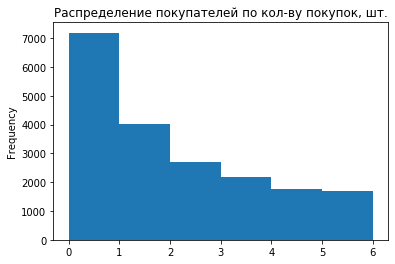

In [31]:
summary['frequency'].plot(kind='hist',bins = 6)
plt.title('Распределение покупателей по кол-ву покупок, шт.')
display(summary['frequency'].describe())
print('-------------------------')
one_time_buyers=round(sum(summary['frequency'] == 0)/float(len(summary))*(100),2)
print('Доля клиентов, совершивших только 1 покупку', one_time_buyers,'%')

In [32]:
# Подготовим данные для BG/NBD модели
bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'],summary['recency'],summary['T'])

<lifetimes.BetaGeoFitter: fitted with 19546 subjects, a: 0.00, alpha: 271.20, b: 18337.55, r: 19.84>

In [33]:
# Модель
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,19.837361,2.790101e+00,1.436876e+01,2.530596e+01
alpha,271.202717,3.804375e+01,1.966370e+02,3.457685e+02
a,0.000010,9.946378e-03,-1.948512e-02,1.950468e-02
b,18337.545026,1.434158e+07,-2.809116e+07,2.812784e+07


Мы получили оценочные значения параметров распределения из исторических данных. Теперь модель использует их для прогнозирования будущих транзакций и скорости оттока клиентов.

In [34]:
#Сделаем прогноз "живых" клиентов, т.е. тех, кто продолжит пользоваться подпиской.
summary['probability_alive'] = bgf.conditional_probability_alive(summary['frequency'],summary['recency'],summary['T'])
display(summary.sample(10))

,user_id,frequency,recency,T,monetary_value,probability_alive
320,2121480,0.0,0.0,39.0,0.00,1.0
8416,8643547,0.0,0.0,15.0,0.00,1.0
5761,8442220,1.0,7.0,27.0,4.99,1.0
4003,8308285,0.0,0.0,27.0,0.00,1.0
9980,8745800,3.0,21.0,27.0,4.99,1.0
19390,9496609,0.0,0.0,1.0,0.00,1.0
6935,8535700,3.0,21.0,34.0,4.99,1.0
9918,8741295,3.0,21.0,27.0,4.99,1.0
17834,9366191,0.0,0.0,5.0,0.00,1.0
2495,8211009,3.0,21.0,22.0,4.99,1.0


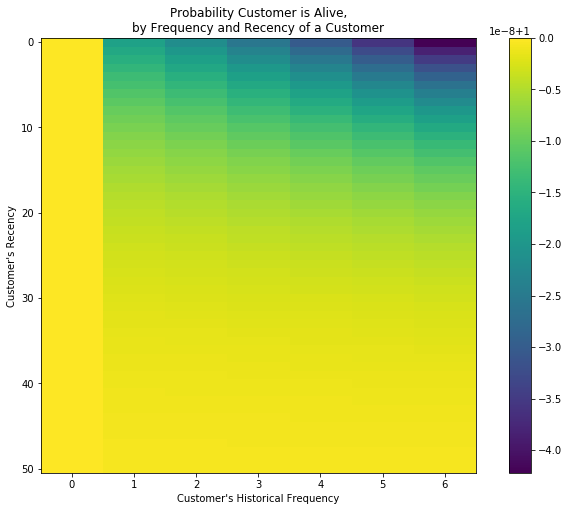

In [35]:
#Визуальное представление взаимосвязи между сроком и частотой покупок.
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

Вероятность остаться в живых рассчитывается на основе давности и частоты клиентов.

Если клиент покупал несколько раз (частота) и время между первой и последней транзакцией велико (новизна), то его/ее вероятность остаться в живых высока.
Точно так же, если клиент имеет меньшую частоту (покупал один или два раза) и время между первой и последней транзакцией мало (новизна), то его/ее вероятность остаться в живых высока.
Так как наши данные свидетельствуют о еженедельных и регулярных покупках, то модель предсказывает высокий процент "оставшихся в живых" клиентов. 
Следующее, что мы можем сделать с этой обученной моделью, — предсказать вероятные будущие транзакции для каждого клиента. 

In [36]:
# Предскажем покупки на 6 мес. на основе исторических данных
t=180
summary['pred_num'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'],summary['recency'],summary['T']),2)
summary.sort_values(by='pred_num', ascending=False).sample(10).reset_index()

,index,user_id,frequency,recency,T,monetary_value,probability_alive,pred_num
0,2223,8192538,0.0,0.0,43.0,0.00,1.0,11.36
1,3763,8289864,5.0,35.0,40.0,4.99,1.0,14.37
2,13296,8993832,2.0,14.0,18.0,4.99,1.0,13.59
3,1380,7089619,1.0,7.0,8.0,4.99,1.0,13.43
4,14381,9076475,1.0,7.0,10.0,4.99,1.0,13.34
5,4872,8375739,5.0,35.0,39.0,4.99,1.0,14.41
6,2631,8217103,6.0,42.0,42.0,4.99,1.0,14.85
7,9967,8744873,1.0,7.0,27.0,4.99,1.0,12.58
8,2864,8231119,3.0,21.0,28.0,4.99,1.0,13.74
9,5939,8454570,5.0,35.0,36.0,4.99,1.0,14.55


Модель BG/NBD может только предсказывать будущие транзакции и скорость оттока клиентов. Чтобы добавить денежный аспект проблемы, мы должны смоделировать денежную стоимость, используя Гамма-гамма-модель .

Некоторые из ключевых допущений модели Гамма-Гамма:

1. Денежная стоимость данной транзакции клиента случайным образом варьируется вокруг средней стоимости транзакции.

2. Средняя стоимость транзакции варьируется в зависимости от клиентов, но не меняется с течением времени для любого конкретного клиента.

3. Распределение средних значений транзакций между клиентами не зависит от процесса транзакций.

В качестве первого шага перед подгонкой модели к данным мы должны проверить, верны ли предположения, сделанные моделью, для данных. Только если он удовлетворяет, мы должны двигаться дальше.

Из этих трех можно подтвердить последнее предположение. Это означает, что не должно быть никакой связи между частотой и денежной стоимостью транзакций. Это легко проверить с помощью корреляции Пирсона.

ПРИМЕЧАНИЕ. Мы учитываем только клиентов, которые совершали повторные покупки в компании, т. е. частота > 0. Потому что, если частота равна 0, это означает, что они являются разовыми клиентами и отменили подписку на продукт, т.е. "умерли".

In [37]:
#Проверим отношение между частотой и стоимостью покупок

return_customers_summary = summary[summary['frequency']>0]
display(return_customers_summary.shape)
return_customers_summary.head()

(12353, 7)

,user_id,frequency,recency,T,monetary_value,probability_alive,pred_num
1,9010,2.0,14.0,17.0,4.99,1.0,13.64
2,23403,2.0,15.0,24.0,4.99,1.0,13.32
3,23647,2.0,14.0,21.0,4.99,1.0,13.45
4,33989,2.0,14.0,17.0,4.99,1.0,13.64
5,59163,3.0,21.0,28.0,4.99,1.0,13.74


In [38]:
return_customers_summary[['frequency', 'monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,-0.008215
monetary_value,-0.008215,1.000000


Корреляция кажется очень слабой. Следовательно, мы можем сделать вывод, что предположение выполнено, и мы можем подогнать модель к нашим данным.

In [39]:
#Смоделируем прогноз по стоимости используя Гамма-Гамма модель
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(return_customers_summary['frequency'], return_customers_summary['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 12353 subjects, p: 10.81, q: 11.71, v: 5.36>

In [40]:
# Посмотрим все подобранные параметры
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,10.812076,0.122872,10.571247,11.052906
q,11.706420,0.125442,11.460555,11.952286
v,5.363562,0.071299,5.223816,5.503307


Затем мы можем предсказать ожидаемую среднюю прибыль для каждой транзакции и пожизненную ценность клиента, используя одну из двух моделей:

- model.conditional_expected_average_profit(): этот метод вычисляет условное ожидание средней прибыли на транзакцию для группы из одного или нескольких клиентов.
- model.customer_lifetime_value(): этот метод вычисляет среднюю стоимость жизни группы из одного или нескольких клиентов. Этот метод использует модель BG/NBD и горизонт прогнозирования в качестве параметра для расчета CLV.

Посчитаем стоимость жизненного цикла клиента напрямую, используя метод model.customer_lifetime_value из пакета жизненного цикла.

In [41]:
summary['predicted_ltv'] = ggf.customer_lifetime_value(bgf,summary['frequency'],
                                                       summary['recency'],
                                                       summary['T'], 
                                                       summary['monetary_value'],
                                                       time=6,#Период в месяцах
                                                       freq='W') #Период в данных          
display(summary.sample(5))

,user_id,frequency,recency,T,monetary_value,probability_alive,pred_num,predicted_ltv
15958,9206464,0.0,0.0,10.0,0.00,1.0,12.70,9.621913
12014,8892810,3.0,21.0,22.0,4.99,1.0,14.02,9.994766
2576,8214744,0.0,0.0,42.0,0.00,1.0,11.40,8.638840
10813,8805586,0.0,0.0,25.0,0.00,1.0,12.06,9.134650
3750,8288966,4.0,35.0,39.0,4.99,1.0,13.83,9.819648


In [42]:
# LTV посчитана без учета маржинальности. Добавим этот параметр. 
#Т.к. этих данных не было в ТЗ, поставим маржинальность, равную 100%
margin_rate = 1
summary['LTV'] = summary['predicted_ltv'] * margin_rate
summary.head()

,user_id,frequency,recency,T,monetary_value,probability_alive,pred_num,predicted_ltv,LTV
0,404,0.0,0.0,10.0,0.00,1.0,12.70,9.621913,9.621913
1,9010,2.0,14.0,17.0,4.99,1.0,13.64,9.790456,9.790456
2,23403,2.0,15.0,24.0,4.99,1.0,13.32,9.558299,9.558299
3,23647,2.0,14.0,21.0,4.99,1.0,13.45,9.656433,9.656433
4,33989,2.0,14.0,17.0,4.99,1.0,13.64,9.790456,9.790456


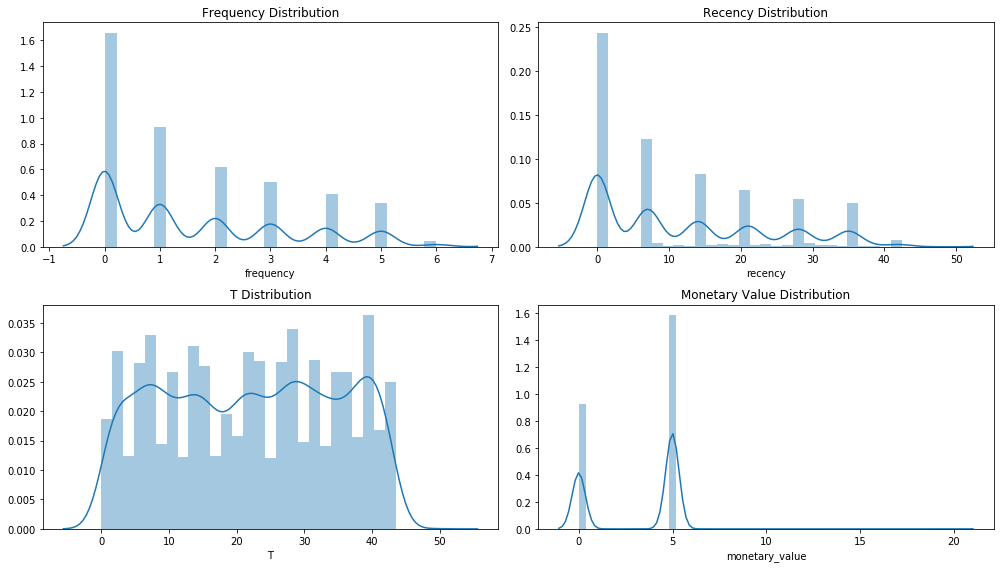

In [43]:
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

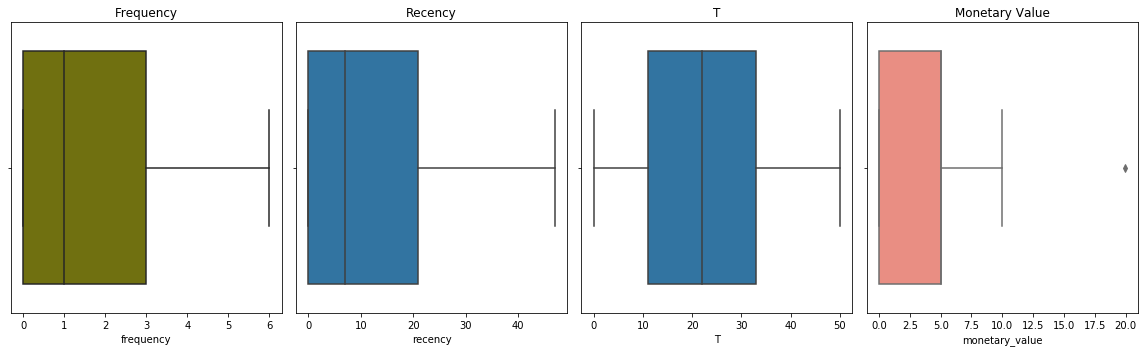

In [44]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(summary["monetary_value"], color = "salmon")
plt.title("Monetary Value")
plt.tight_layout()

In [45]:
print('Средний прогнозируемый LTV на одного покупателя за 6 мес. составил:',summary['LTV'].mean().round(2),'USD')

Средний прогнозируемый LTV на одного покупателя за 6 мес. составил: 9.63 USD


**Вывод:** За 6 месяцев средний прогнозируемый LTV на одного покупателя составил: 9.63 у.е.

## График LTV

Построим график частоты повторных покупок и сравним данные прогноза с историческими данными. 

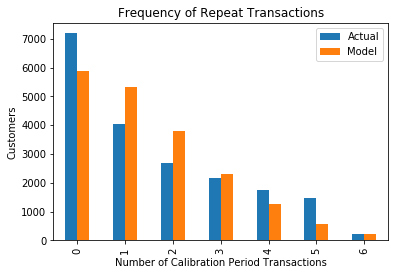

In [46]:
plot_period_transactions(bgf)

## Расчет ROMI

Добавим стоимость привлечения 1 клиента (CAC) в таблицу с данными. Расчитаем ROMI на 4 недели.

In [47]:
CAC = 6 #Customer Acquisition Cost на одного клиента (в USD). Дано в условиях задачи.
report['cac'] = CAC
report = report[(report['age']<=3)] #Ограничим "возраст" когорты 4-мя неделями.
display(report.sample(5))

,first_order_week,n_buyers,purchase_week,revenue,gp,age,ltv,cac
42,2020-02-20,90,2020-02-20,449.10,449.10,0,4.990000,6
2,2019-12-26,1,2020-01-09,4.99,4.99,2,4.990000,6
15,2020-01-09,3475,2020-01-09,17345.24,17345.24,0,4.991436,6
8,2020-01-02,325,2020-01-09,1297.40,1297.40,1,3.992000,6
10,2020-01-02,325,2020-01-23,1022.95,1022.95,3,3.147538,6


In [48]:
report['romi'] = report['ltv'] / report['cac']
output = report.pivot_table(
    index='first_order_week', columns='age', values='romi', aggfunc='mean')

output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3
first_order_week,,,,
2019-12-26,0.83,1.66,2.5,3.33
2020-01-02,0.83,1.5,2.1,2.62
2020-01-09,0.83,1.47,2.01,2.5
2020-01-16,0.83,1.46,2,2.45
2020-01-23,0.83,1.43,1.94,2.37
2020-01-30,0.83,1.41,1.87,1.89
2020-02-06,0.83,1.4,1.43,
2020-02-13,0.83,0.87,,
2020-02-20,0.83,,,


In [49]:
output.cumsum(axis=1).mean(axis=0) 

age
0    0.832027
1    1.399620
2    1.977010
3    2.526770
dtype: float64

**Вывод:** В среднем когорты окупаются на 2-ую неделю. 

In [50]:
CAC = 6 #Customer Acquisition Cost на одного клиента (в USD). Дано в условиях задачи.
summary['cac'] = CAC
summary['pred_num'] = summary['pred_num'].round(0)
display(summary.sample(5))

,user_id,frequency,recency,T,monetary_value,probability_alive,pred_num,predicted_ltv,LTV,cac
17737,9357503,0.0,0.0,6.0,0.00,1.0,13.0,9.760756,9.760756,6
4545,8349745,5.0,35.0,39.0,4.99,1.0,14.0,10.203106,10.203106,6
14147,9059113,2.0,14.0,15.0,4.99,1.0,14.0,9.858872,9.858872,6
16367,9240649,1.0,7.0,9.0,4.99,1.0,13.0,9.741734,9.741734,6
106,761622,3.0,21.0,37.0,4.99,1.0,13.0,9.508328,9.508328,6


In [51]:
summary['romi'] = summary['LTV'] / summary['cac']

summary = pd.merge(summary,orders_new[['user_id','first_order_week']],how='left', on='user_id')

display(summary.sample(5))

,user_id,frequency,recency,T,monetary_value,probability_alive,pred_num,predicted_ltv,LTV,cac,romi,first_order_week
31035,8699004,1.0,7.0,21.0,4.99,1.0,13.0,9.341666,9.341666,6,1.556944,2020-01-30
24527,8554795,3.0,21.0,22.0,4.99,1.0,14.0,9.994766,9.994766,6,1.665794,2020-01-23
14510,8335622,5.0,35.0,37.0,4.99,1.0,15.0,10.269316,10.269316,6,1.711553,2020-01-09
47875,9266571,1.0,7.0,9.0,4.99,1.0,13.0,9.741734,9.741734,6,1.623622,2020-02-06
3676,7136978,3.0,21.0,23.0,4.99,1.0,14.0,9.960793,9.960793,6,1.660132,2020-01-23


In [52]:
output_6m = summary.pivot_table(
    index='first_order_week', columns='pred_num', values='romi', aggfunc='mean')

output_6m.cumsum(axis=1).round(2).fillna('')

pred_num,11.0,12.0,13.0,14.0,15.0
first_order_week,,,,,
2019-12-26,,,,1.7,
2020-01-02,1.43,2.89,4.42,6.07,7.81
2020-01-09,1.45,2.91,4.46,6.14,7.86
2020-01-16,,1.5,3.06,4.73,6.46
2020-01-23,,1.52,3.09,4.74,
2020-01-30,,1.56,3.15,4.78,
2020-02-06,,,1.61,3.33,
2020-02-13,,,1.64,,
2020-02-20,,,1.66,,


In [53]:
print('Средний прогнозируемый ROMI на одного покупателя за 6 мес. составил:',summary['romi'].mean().round(2))

Средний прогнозируемый ROMI на одного покупателя за 6 мес. составил: 1.63
